In [ ]:
import sys, pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.width", 120)
print(sys.executable)
print("pandas:", pd.__version__, "numpy:", np.__version__)



/Users/m_masoor/Desktop/data_science_projects/.venv/bin/python
pandas: 2.3.2 numpy: 2.3.2


In [73]:
#loading the data and a quick scan
df = pd.read_csv("hotel-booking-data.txt", delimiter = "\t")

print("Shape (rows, columns) : ", df.shape)
print("\nColumn names: ")
print(df.columns.tolist())


print("First 5 rows of the dataset: ")
display(df.head(5))
print("Last 5 rows of the dataset: ")
display(df.tail(5))
print("5 random rows of the dataset: ")
display(df.sample(5, random_state = 37))


Shape (rows, columns) :  (195, 4)

Column names: 
['Date', 'Company', 'Person Name', 'Room number']
First 5 rows of the dataset: 


,Date,Company,Person Name,Room number
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0
3,Hotels,NaN,NaN,NaN
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0


Last 5 rows of the dataset: 


,Date,Company,Person Name,Room number
190,Cleartrip,NaN,NaN,NaN
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0
194,Hotels,NaN,NaN,NaN


5 random rows of the dataset: 


,Date,Company,Person Name,Room number
169,1-Jan-2022,Skinix,Julianne Ghelardi,5004.0
180,1-Jan-2022,Aimbo,Ashil Conichie,1014.0
40,1-Jan-2022,Kimia,Lottie Barnsdall,2014.0
70,1-Jan-2022,Meevee,Rodrique Brockbank,2013.0
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0


In [74]:
#general information about the dataset
print("\nInfo summary: ")
df.info()



Info summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         195 non-null    object 
 1   Company      134 non-null    object 
 2   Person Name  153 non-null    object 
 3   Room number  153 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.2+ KB


In [76]:
#descriptive analysis
print("Numeric summary: ")
display(df.describe())

print("Categorial summary: ")
display(df.describe(include = "object"))

print("Missing values per cloumn: ")
print(df.isnull().sum().sort_values())

Numeric summary: 


,Room number
count,153.000000
mean,3079.326797
std,1718.791186
min,1001.000000
25%,2001.000000
50%,3008.000000
75%,4010.000000
max,7002.000000


Categorial summary: 


,Date,Company,Person Name
count,195,134,153
unique,6,114,153
top,1-Jan-2022,Leexo,Anatole Ridehalgh
freq,153,3,1


Missing values per cloumn: 
Date            0
Person Name    42
Room number    42
Company        61
dtype: int64


In [81]:
#check unique values
print("Unique values per column: ")
df.nunique()

Unique values per column: 


Date             6
Company        114
Person Name    153
Room number     60
dtype: int64

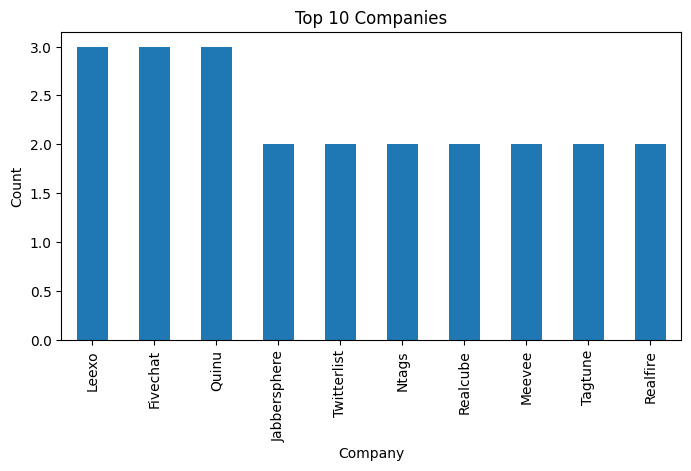

In [ ]:
# Top 10 companies by count(Categorical column):
if "Company" in df.columns:
    df["Company"].value_counts().head(10).plot(
        kind= "bar", figsize =(8,4), title = "Top 10 Companies"  
    )
    plt.xlabel("Company")
    plt.ylabel("Count")
    plt.show()

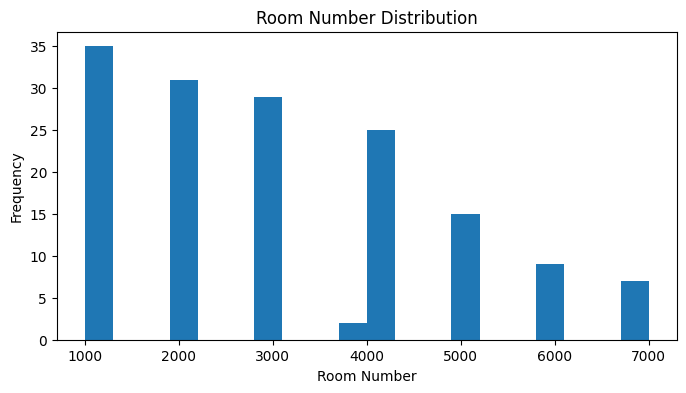

In [ ]:
#distribution on room number (numerical column):()
if "Room number" in df.columns:
    df["Room number"].dropna().plot(kind="hist", bins = 20, figsize = (8,4), title="Room Number Distribution")
    plt.xlabel("Room Number")
    plt.ylabel("Frequency")
    plt.show()

## Key Observations in the data:

Dataset contains 195 rows, 4 columns.
Missing values:
1: Company: 61 missing
2: Person Name: 42 missing
3: Room number: 42 missing
4: Data is stored as text (object type), not as datetime.
5: Room number is numeric but should be treated as categorical (rooms are identifiers, not quantities).
6: Company has many unique values, with a few frequent ones dominating.

Simple plots show:
  1: Company distribution is flat, with most top companies having only 2, 3 bookings each.
  2: Room number distribution looks scattered, not continuous like real numeric data.